In [1]:
include("prepare_data_Sioux_simp.jl")

furInfo (generic function with 1 method)

In [2]:
demandsDict = Dict{Int64, Dict{(Int64,Int64), Float64}}()
# get ground trueth demands, indexed by 0
demandsDict[0] = iniDemand("../data_original/SiouxFalls_trips_simp.txt")
# get initial demands, indexed by 1
demandsDict[1] = iniDemand("../data_original/SiouxFalls_trips_simp.txt", 1)

numNodes, numLinks, numODpairs, capacity, free_flow_time, ta_data = paraNetwork("Sioux_simp")
numRoutes, odPairRoute, linkRoute, link_label_dict = furInfo()

(636,["100-471"=>1,"51-242"=>1,"56-264"=>1,"69-326"=>1,"46-220"=>1,"66-313"=>1,"79-362"=>1,"121-574"=>1,"7-23"=>1,"19-81"=>1,"103-487"=>1,"13-54"=>1,"20-86"=>1,"44-211"=>1,"31-148"=>1,"126-597"=>1,"130-629"=>1,"107-504"=>1,"111-520"=>1,"95-446"=>1,"78-357"=>1,"43-204"=>1,"26-113"=>1,"107-505"=>1,"61-289"=>1,"9-39"=>1,"110-518"=>1,"3-7"=>1,"127-604"=>1,"63-294"=>1,"122-577"=>1,"37-173"=>1,"96-448"=>1,"94-441"=>1,"52-244"=>1,"131-632"=>1,"106-501"=>1,"23-101"=>1,"105-494"=>1,"103-485"=>1,"102-484"=>1,"128-611"=>1,"95-445"=>1,"84-387"=>1,"14-58"=>1,"118-561"=>1,"14-60"=>1,"117-557"=>1,"53-251"=>1,"34-159"=>1,"76-346"=>1,"31-150"=>1,"124-587"=>1,"57-268"=>1,"19-79"=>1,"81-375"=>1,"48-228"=>1,"55-258"=>1,"18-74"=>1,"67-320"=>1,"108-508"=>1,"63-296"=>1,"8-31"=>1,"113-533"=>1,"33-156"=>1,"42-202"=>1,"78-356"=>1,"129-615"=>1,"45-212"=>1,"112-526"=>1,"91-424"=>1,"9-40"=>1,"120-570"=>1,"109-512"=>1,"118-559"=>1,"100-466"=>1,"42-203"=>1,"92-431"=>1,"20-87"=>1,"86-392"=>1,"74-340"=>1,"97-450"=>1,"

## Solve an inverse tarffic problem over polynomials of degree at most d

## Optionally use a regularizer from the poly kernel

In [4]:
include("tap_Sioux_simp.jl")

TAP (generic function with 2 methods)

In [5]:
tapFlowVecDict = Dict{Int64, Array{Float64, 1}}()
tapFlowDicDict = Dict{Int64, Dict{(Int64,Int64),Float64}}()

fcoeffs = [1, 0, 0, 0, .15]

tapFlowDicDict[0], tapFlowVecDict[0] = TAP(demandsDict[0], fcoeffs)
tapFlowDicDict[1], tapFlowVecDict[1] = TAP(demandsDict[1], fcoeffs)

([(11,12)=>4803.477811953725,(4,3)=>4173.979407701254,(2,6)=>5648.6591228106445,(11,4)=>5867.758004259465,(5,6)=>5559.334874371963,(4,11)=>6160.8883008373905,(8,6)=>7020.922232477449,(5,4)=>6677.302590572539,(10,11)=>9858.651494760927,(2,1)=>4588.093479215409,(8,9)=>6337.735239215738,(12,3)=>5029.059234216006,(11,10)=>9982.14749910827,(3,1)=>5246.090514759867,(5,9)=>6834.638535835533,(6,2)=>5659.425683962453,(6,8)=>6962.7996599744665,(4,5)=>6635.438521541513,(1,3)=>5268.612245773832,(8,7)=>6245.757748863913,(7,8)=>6617.155468074336,(12,11)=>5040.305249547191,(9,10)=>10207.494883261796,(3,12)=>5058.432320049615,(6,5)=>5566.598695866375,(1,2)=>4573.202774599137,(9,8)=>6129.813812871162,(10,9)=>9708.016072150958,(3,4)=>4156.654975336897,(9,5)=>6723.915235048039],[4573.2,5268.61,4588.09,5648.66,5246.09,4156.65,5058.43,4173.98,6635.44,6160.89  …  6723.92,6129.81,10207.5,9708.02,9858.65,5867.76,9982.15,4803.48,5029.06,5040.31])

In [6]:
arcsDict = Dict{Int64, Dict{(Int, Int), Arc}}()

# get arcs data corresponding to ground truth demands and flows
arcsDict[0] = observFlow("../data_original/SiouxFalls_net_simp.txt", tapFlowDicDict[0])

# get arcs data corresponding to initial demands and flows
arcsDict[1] = observFlow("../data_original/SiouxFalls_net_simp.txt", tapFlowDicDict[1])

Dict{(Int64,Int64),Arc} with 30 entries:
  (11,12) => Arc(11,12,4908.82673,6.0,4803.477811953725)
  (4,3)   => Arc(4,3,17110.52372,4.0,4173.979407701254)
  (2,6)   => Arc(2,6,4958.180928,5.0,5648.6591228106445)
  (11,4)  => Arc(11,4,4908.82673,6.0,5867.758004259465)
  (5,6)   => Arc(5,6,4947.995469,4.0,5559.334874371963)
  (4,11)  => Arc(4,11,4908.82673,6.0,6160.8883008373905)
  (8,6)   => Arc(8,6,4898.587646,2.0,7020.922232477449)
  (5,4)   => Arc(5,4,17782.7941,2.0,6677.302590572539)
  (10,11) => Arc(10,11,10000.0,5.0,9858.651494760927)
  (2,1)   => Arc(2,1,25900.20064,6.0,4588.093479215409)
  (8,9)   => Arc(8,9,5050.193156,10.0,6337.735239215738)
  (12,3)  => Arc(12,3,23403.47319,4.0,5029.059234216006)
  (11,10) => Arc(11,10,10000.0,5.0,9982.14749910827)
  (3,1)   => Arc(3,1,23403.47319,4.0,5246.090514759867)
  (5,9)   => Arc(5,9,10000.0,5.0,6834.638535835533)
  (6,2)   => Arc(6,2,4958.180928,5.0,5659.425683962453)
  (6,8)   => Arc(6,8,4898.587646,2.0,6962.7996599744665)
  (4,5)   =

In [7]:
include("inverseVI.jl")

train (generic function with 1 method)

In [8]:
coeffs_dict = Dict{(Int64,Float64,Float64),Array{Float64,1}}()

deg = 6
c = 3.41
lam = 1.

fcoeffs, ys, resids = train(lam, deg, c, demandsDict[1], arcsDict[1])
coeffs_dict[(deg, c, lam)] = fcoeffs

7-element Array{Float64,1}:
  1.0        
 -0.000687417
  0.00323666 
 -0.00606948 
  0.00560742 
 -0.00254607 
  0.000454585

### Visualize the estimated cost function

INFO: Loading help data...


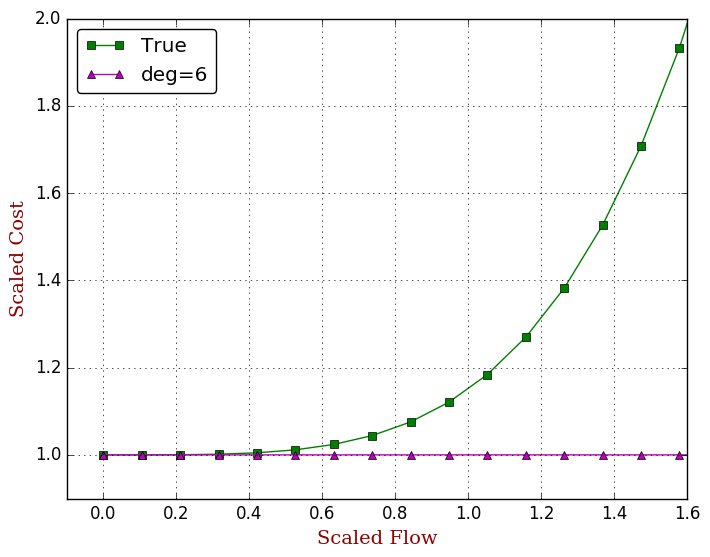

In [9]:
using PyPlot

true_coeffs = [1, 0, 0, 0, .15]

fcoeffs = coeffs_dict[(6, 3.41, 1.)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(fcoeffs, x), xs)

plot(xs, zs_true, "s-g", label="True")

plot(xs, zs, "^-m", label="deg=6")
legend(loc="upper left",fancybox="true") 

grid("on")
xlim(-0.1, 1.6);
ylim(0.9, 2.0);

font1 = ["family"=>"serif","color"=>"darkred","weight"=>"normal","size"=>14]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("fitting_Sioux_simp.pdf")